 - %sh은 단락이 변경되면 위치도 변경됨.
 
 --> zeppelin이 떠 있는 shell만 해당
 
----
### RDD 만들기

 - val rdd = sc.textFile("hdfs://hadoop-master-01:9000/kikang/data/airline_on_time/2008.csv",9)
 
    -----
    - 저장되어 있는 데이터 
    #### File ; HDFS, amazon S3 , local
    --> txt, csv, json, parquet
        : txt를 제외하면 schema 구조 (column, key/value)
    
    #### RDB table data ; MYSQL, ORACLE 
        : show.tables
        : meta data --> data의 data! 
        : table 의 meta data == column info 
        
    #### NOSQL ; mongoDB, cassandra...
    
    #### DW(bigdata) ; Hive(저장소는 HDFS를 사용 , map reduce), sparkSQL  == RDB랑 비슷
    --> data warehouse
        : show database
        : show view
        : show tables
        
   ---------- 
   
    - 저장되어 있지 않은 데이터 
    
    **IOT data, Sensor data --> 실시간 데이터**
        - Streaming data (저장소가 없음) 
 
        ex) twitter (sample로만 가지고 있기 때문에 server 한 대로도 충분)
        - 실시간으로 올린 트윗을 받을 수 있다. 
        - social network 분석 등등 
        
        ex) kafka
        - Que : streaming 처리할 때 많이 사용
        
   ----- 
  #### Driver --> executor cluster 할당 (YARN, Standaloe(spark 전용), Mesos, K8S)
  
   - spark-shell
   - pyspark --> cmd windows/jupyter
   - sparkR
   - spark-sql
   - zeppelin interpreter (driver 역할)
   - JupyterNotebook
   - thrift server (option) --> BI tool (JDBC/ODBC)
   
   
 -----  -----  -----  -----  -----  -----  -----  -----  -----  ----- -----  -----  -----  -----  READ / WRITE
 
 - RDD(txt)
 - DataFrame(all) : 현업에서 사용
 
     --> SQL 이지만 RDD style로 코딩할수도 있음.
     

 - MLlib / GraphX
 
     --> sklearn 이랑 비슷하다고 보면 됨.
 
     --> GraphX (네트워크 상의 Nevi) 

----
val df2 = df\
.select("Month","Year","FlightNum")\
.groupBy("Year","Month")\
.agg(avg("FlightNum"), min("FlightNum"),max("FlightNum"),count("FlightNum").as("cnt_flight"))

df2.show()


-----
#### api 문서 --> spark site , documentation , spi docs
 - Dataset == DataFrame
 - spark는 파일명 지정 불가능 , 경로까지만 지정됨 
-----
#### 파일 저장
df2.write.json("hdfs://hadoop-master-01:9000/kikang/data/airline_on_time.json")

-----
* spark.catalog

 - res31: org.apache.spark.sql.catalog.Catalog = org.apache.spark.sql.internal.CatalogImpl@16a59611
 
* spark.catalog.currentDatabase :  warehouse 구성
 - res32: String = default


* spark.catalog.listDatabases
 
 - res33: org.apache.spark.sql.Dataset[org.apache.spark.sql.catalog.Database] = [name: string, description: string ... 1 more field]


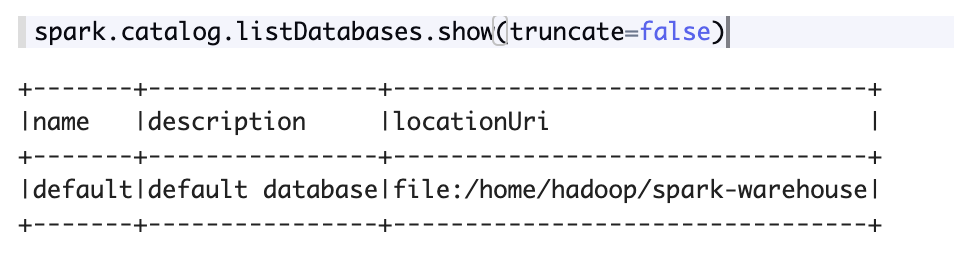

In [1]:
from IPython.display import Image
Image('./capture/listdatabase.png')

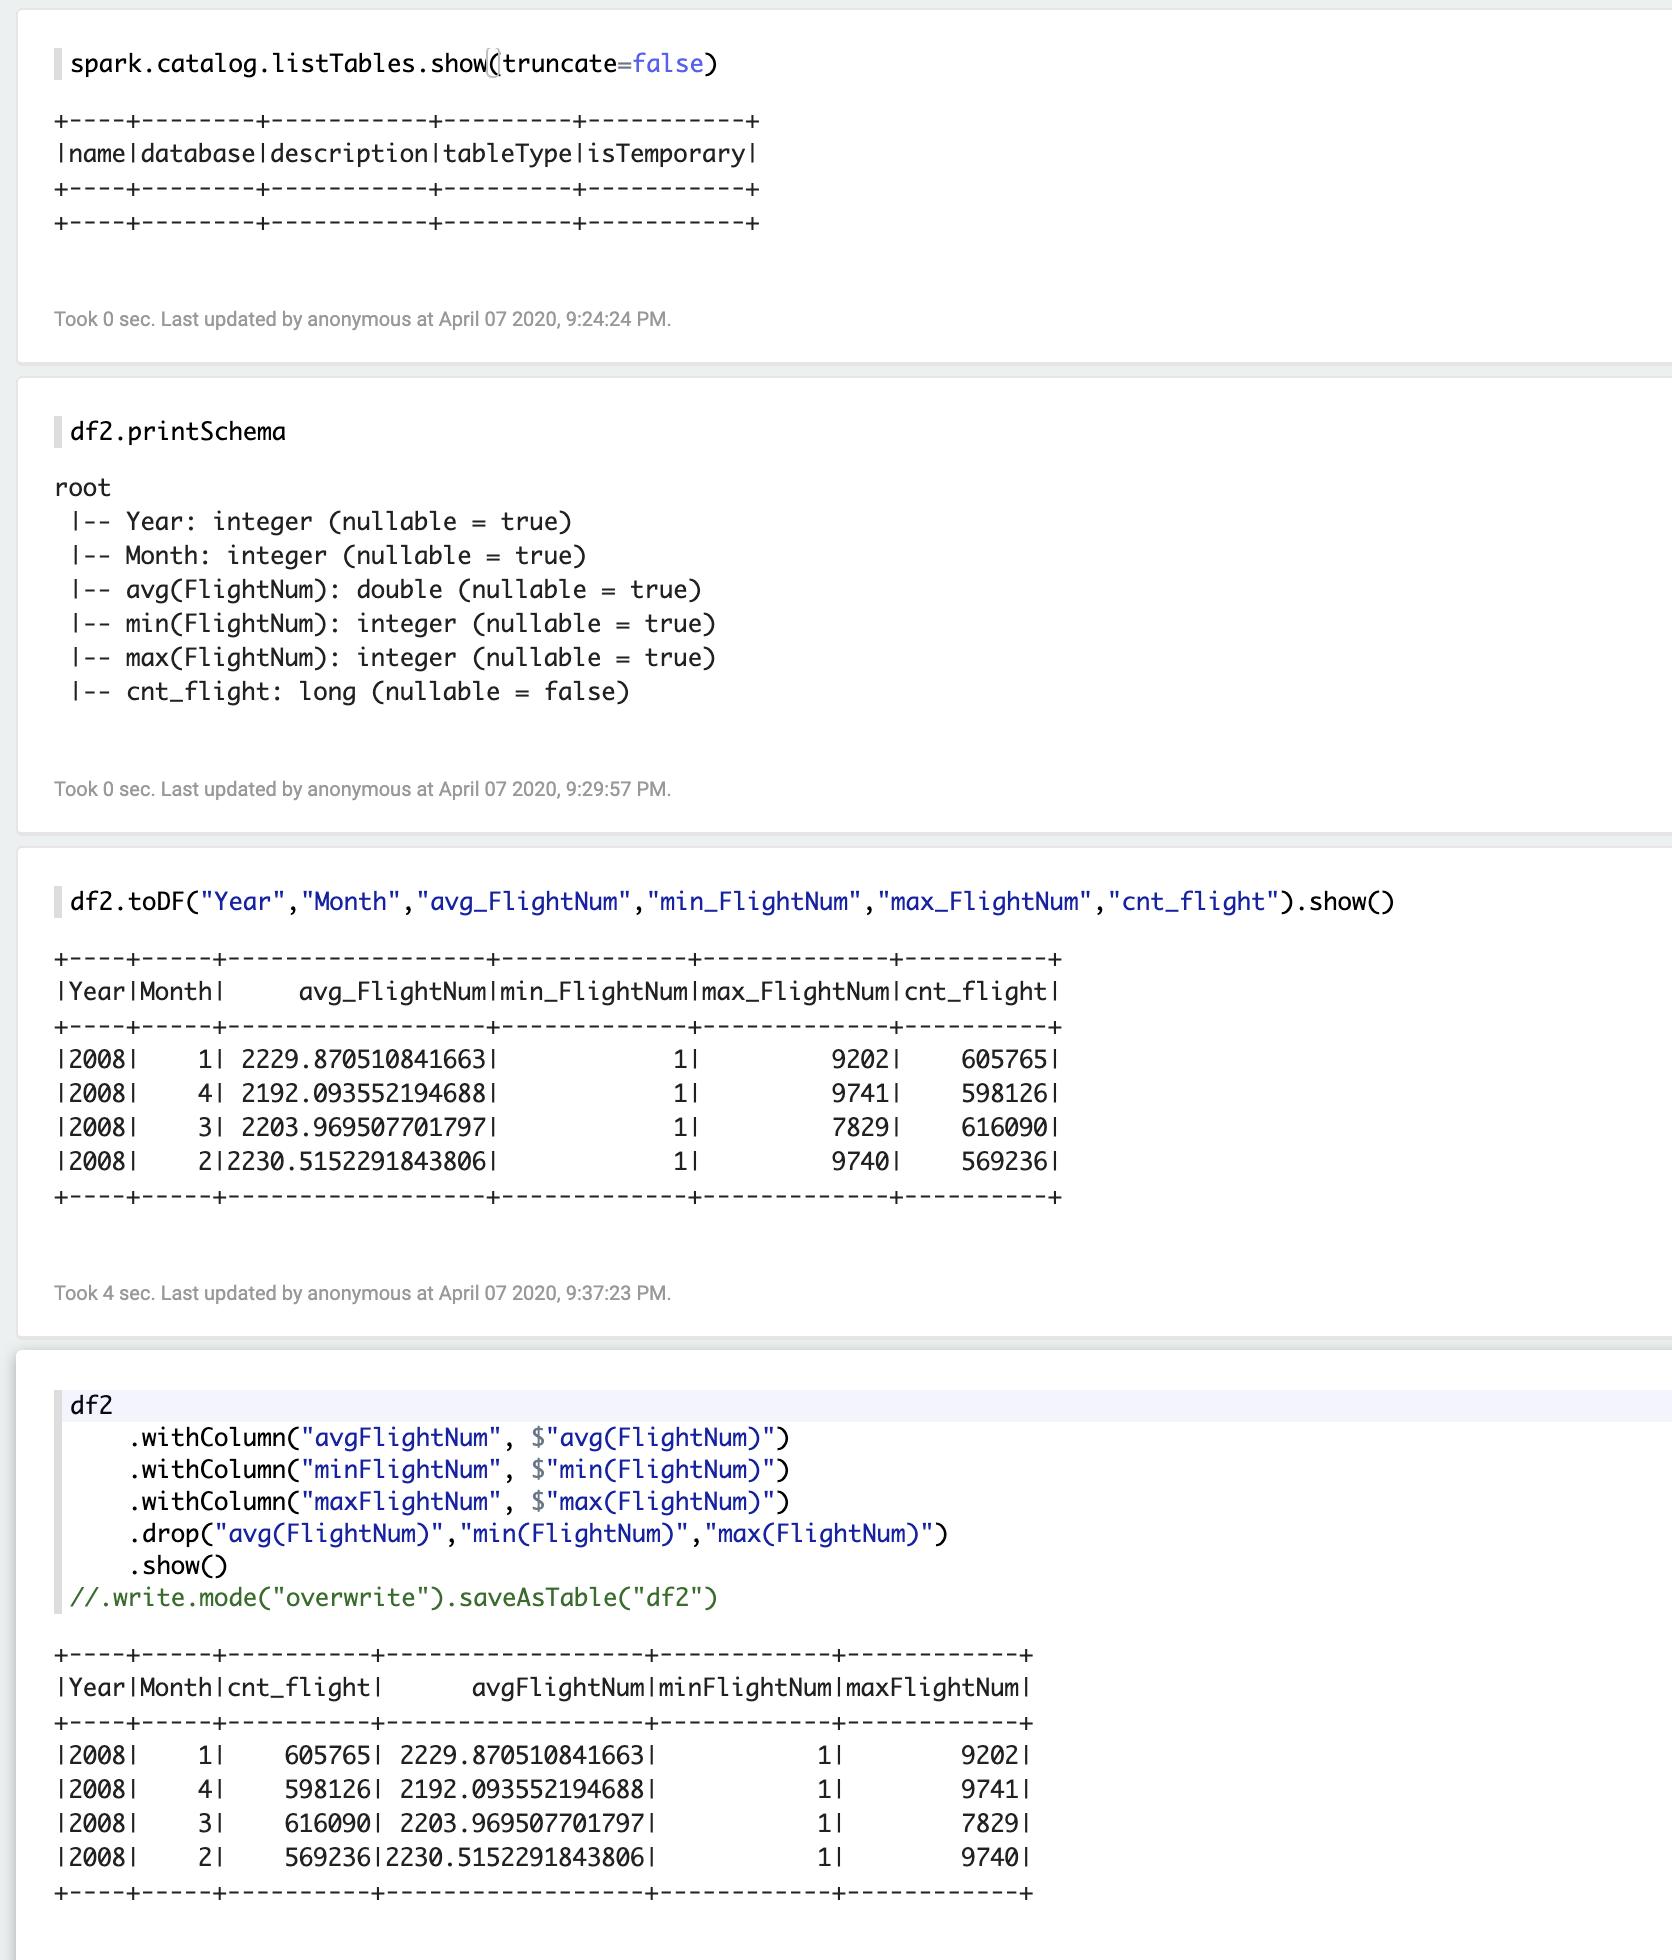

In [3]:
Image('./capture/saveAS.png')

spark.catalog.listTables.show(truncate=false)
df2.printSchema

#### column명 바꾸는 방법

1)

df2.toDF("Year","Month","avg_FlightNum","min_FlightNum","max_FlightNum","cnt_flight")\
.write.mode("overwrite").saveAsTable("df2")

2)

df2
    .withColumn("avgFlightNum", $"avg(FlightNum)")\
    .withColumn("minFlightNum", $"min(FlightNum)")\
    .withColumn("maxFlightNum", $"max(FlightNum)")\
    .drop("avg(FlightNum)","min(FlightNum)","max(FlightNum)")\
    .write.mode("overwrite").saveAsTable("df2")

- drop : 지우고 싶은 column을 삭제할 수 있음 


----
spark.catalog.listTables.show(truncate=false)

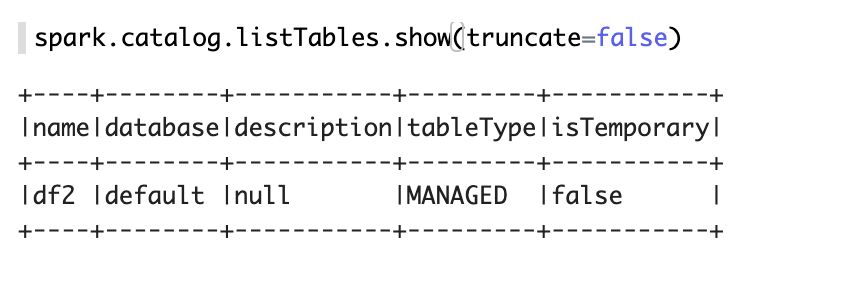

In [4]:
Image('./capture/category_list.png')

spark.table("df2").printSchema

 - data warehouse에 있는 data를 가져옴
 - API방식으로 처리 가능
 
-----

    %sql
    select
        *
    from
        df2
        
        
----
df.createOrReplaceTempView("df")

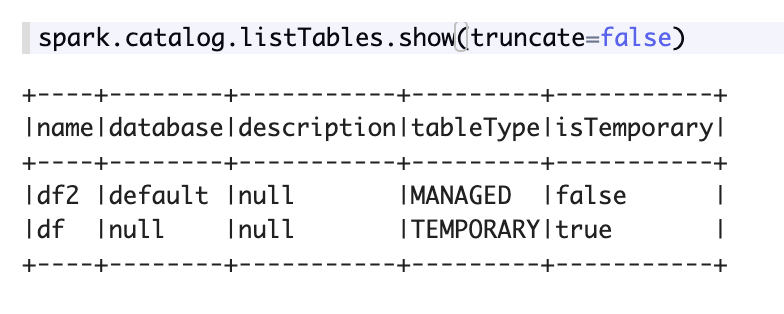

In [5]:
Image('./capture/listTables.png')

----
spark2 edit

 - warehouse 위치지정\
     spark.sql.warehouse.dir | hdfs://hadoop-master-01:9000/spark-warehouse2
 #### 확장자 : parquet
     
-----
1)

val df = spark\
.read\
.option("header",true)\
.option("inferSchema", true)\
.csv("hdfs://hadoop-master-01:9000/kikang/data/airline_on_time/2008.csv")


----
2)

val df2 = df\
.select("Month","Year","FlightNum")\
.groupBy("Year","Month")\
.agg(avg("FlightNum"), min("FlightNum"),max("FlightNum"),count("FlightNum").as("cnt_flight"))\

----
3)

df2.toDF("Year","Month","avg_FlightNum","min_FlightNum","max_FlightNum","cnt_flight")\
.write.mode("overwrite").saveAsTable("df2")

----
4)

    %sql
    
    select 
        *
    from
        df2


-----

#### MYSQL setup

$ sudo yum install -y http://dev.mysql.com/get/mysql-community-release-el7-5.noarch.rpm

$ sudo yum install -y mysql-community-server

$ systemctl start mysqld ## os 시작시 sql start

$ systemctl status mysqld.service

$ systemctl enable mysqld

-----
$ sudo mysql

$ SELECT Host,User,Password FROM mysql.user;

$ INSERT INTO mysql.user (host, user, password, ssl_cipher, x509_issuer, x509_subject) VALUES ('%','root',password(''),'','',''); 

 - root == DB계정

 

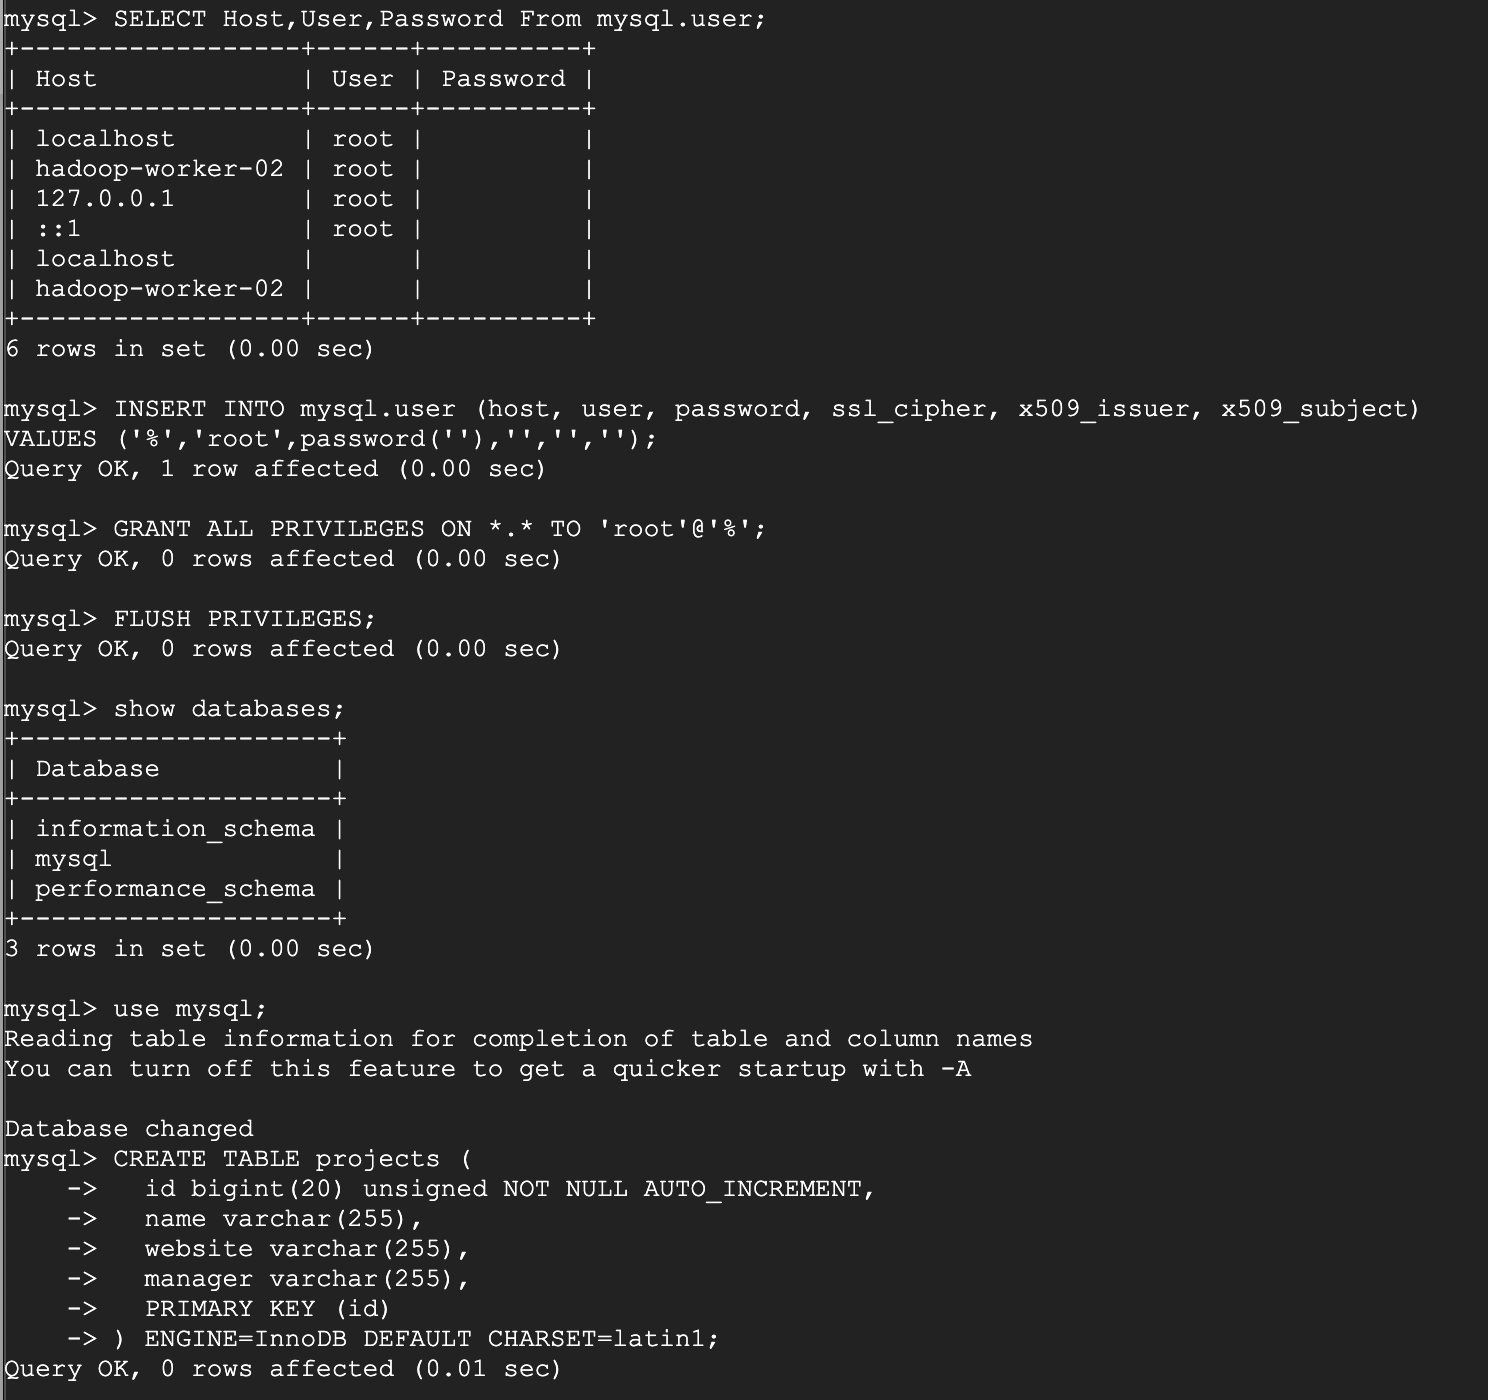

In [7]:
Image('./capture/SQL setup.png')

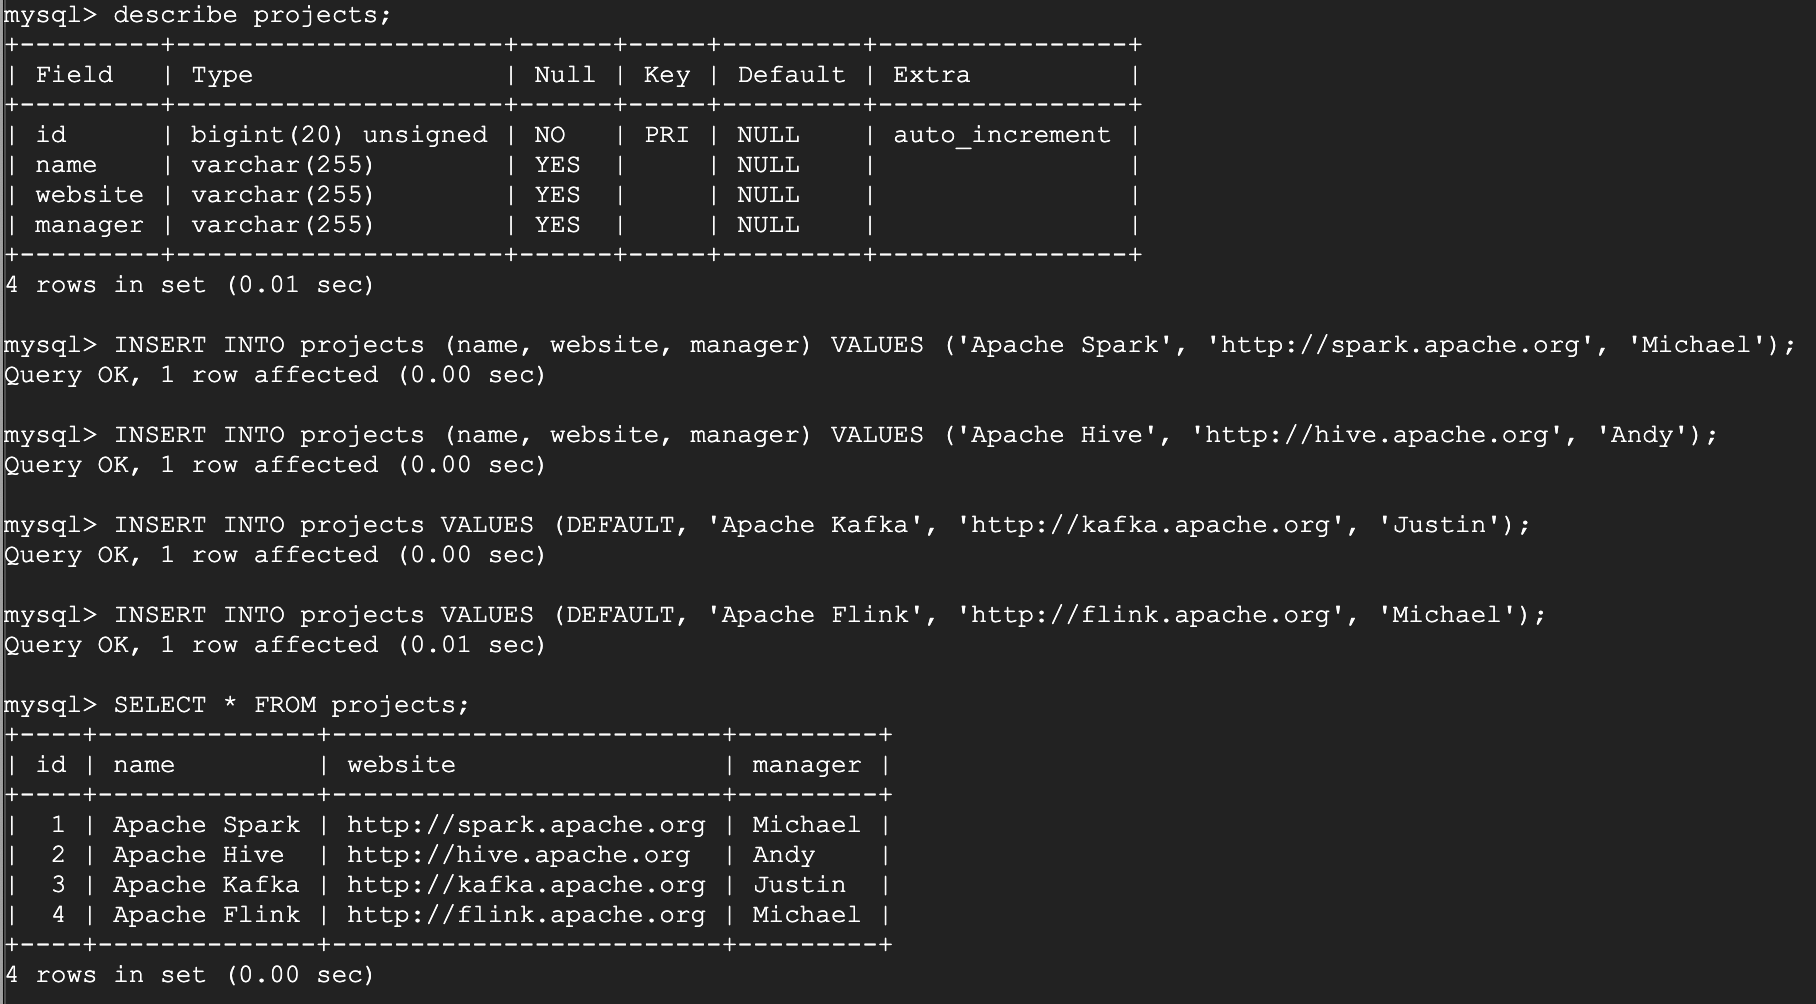

In [8]:
Image('./capture/SQL setup2.png')